# Mutant data displayed as heat map

Here, we display the large data set in two different ways, first as a heat map with custom color scales, and then as a bar chart with error bars. 

In [8]:
import pandas 
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline

from matplotlib import rc 
rc( 'font', family='Source Sans Pro' )
rc( 'axes', linewidth=0 )
rc( 'lines', linewidth=0 ) 

In [9]:
df = pandas.read_csv( 'targets.csv', index_col=0 ) 
df.head()

,sequence_pos,expression,tm,k,err_tm,err_k,kcat,err_kcat,km,err_km,...,ki,ki_percent_err,ki_err,gel_number,target_expression,target_tm,target_kcat,target_km,target_kcatkm,conserved
mutant,,,,,,,,,,,,,,,,,,,,,
G12N,12.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,16.0,0,NaN,NaN,NaN,NaN,0.962179
S14A,14.0,1,40.16,-1.72,0.30,0.37,320.0,11.0,8.25,1.02,...,NaN,NaN,NaN,9.0,1,0.23,-0.439333,-0.217484,-0.651460,0.157390
T15A,15.0,1,39.17,-0.58,0.23,0.07,614.0,14.7,5.30,0.48,...,NaN,NaN,NaN,2.0,1,-0.76,-0.156314,-0.025306,-0.176657,0.615834
S16N,16.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8.0,0,NaN,NaN,NaN,NaN,0.402336
S16A,16.0,1,39.41,-0.83,0.27,0.16,154.0,1.0,14.01,0.40,...,NaN,NaN,NaN,5.0,1,-0.52,-0.756962,-0.447468,-1.199275,0.402336


In [10]:
Reds = plt.get_cmap( 'Reds' ) 
Oranges = plt.get_cmap( 'Oranges' ) 
Blues = plt.get_cmap( 'Blues' ) 
Greens = plt.get_cmap( 'Greens' ) 
Purples = plt.get_cmap( 'Purples' ) 
Greys = plt.get_cmap( 'Greys' ) 

In [11]:
# ok, for for each row, make a list 
# add the list to my_list 

def color_tm( x, const='tm' ):
    if np.isnan( x ):
        return (0,0,0,0)
    elif abs( 0 - x ) < 0.05:
        return (1,1,1,1)
    elif x > 0:
        return Greens( x / df['target_{}'.format(const)].max() )
    else:
        return Purples( x / df['target_{}'.format(const)].min() ) 

def color_const( x, const ):
    if np.isnan( x ):
        return (0,0,0,0)
    elif abs( 0 - x ) < 0.05:
        return (1,1,1,1)
    elif x > 0:
        return Oranges( x / df['target_{}'.format(const)].max() )
    else:
        return Blues( x / df['target_{}'.format(const)].min() ) 
    
my_list = []
for index, row in df.iterrows():
    my_list.append( [
        Greys( row.expression + 0.25 ), 
        color_tm( row.target_tm ),
        color_const( row.target_kcat, 'kcat' ),
        color_const( row.target_km, 'km' ),
        color_const( row.target_kcatkm, 'kcatkm' ),
        Reds( row.conserved ), 
    ] )

In [12]:
my_array = np.array( my_list ) 

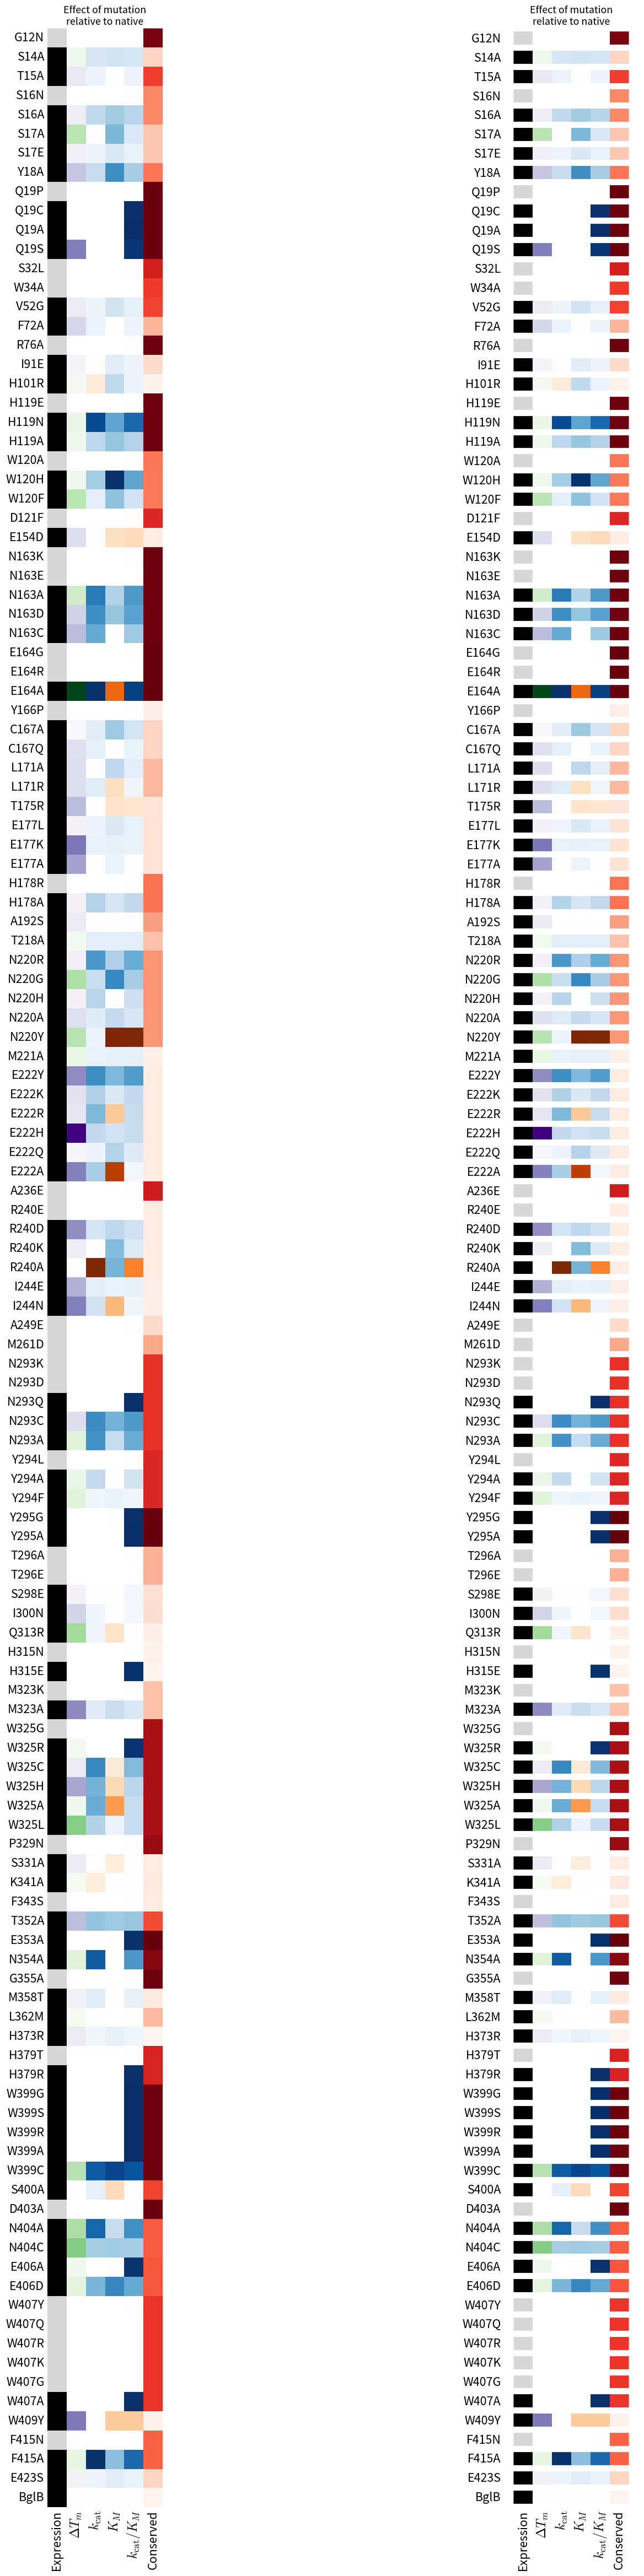

In [14]:
#plt.style.use( 'bmh' ) 

fig, axes = plt.subplots( 1, 2, figsize=( 20, 0.45 * 129 ) ) 

for ax in axes:
    ax.imshow( X=my_array, interpolation='none', origin='upper', aspect='equal' ) 

    index = list( range( len( df ) ) )
    ax.set_title( 'Effect of mutation\nrelative to native', fontsize='x-large' )

    ax.set_yticks( index ) 
    ax.set_yticklabels( df.index, fontsize='xx-large' )
    ax.tick_params( length=0 )

    my_labels = ( '', 'Expression', r'$\Delta T_m$', r'$k_\mathrm{{cat}}$', r'$K_M$', '$k_\mathrm{{cat}}/K_M$', 'Conserved' ) 
    ax.set_xticklabels( my_labels, fontsize='xx-large', rotation=90 )

    # white lines 
    for i in range( 130 ):
        plt.plot( (-0.4,6), (i-.55,i-.55), linewidth=8, color='white' ) 

    # labels
    # for i in range( 129 ):
    #     plt.text( -3, i, list(df.index)[i], fontsize='xx-large', align='right' ) 


    #fig.savefig( 'heat_map.png', dpi=300 ) 
plt.show()